In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


Al explorar datos multidimensionales, un enfoque útil es dibujar varias instancias del mismo gráfico en diferentes subconjuntos de su conjunto de datos. Esta técnica a veces se denomina trazado de "celosía" o "trellis" y está relacionada con la idea de "pequeños múltiplos". Permite a un espectador extraer rápidamente una gran cantidad de información sobre un conjunto de datos complejo.

## 1. Multiples gráficos con FacetGrid 

La clase FacetGrid es útil cuando desea visualizar la distribución de una variable o la relación entre múltiples variables por separado dentro de subconjuntos de su base de datos.

FacetGrid trabaja con tres dimensiones:

        * row 
        * col
        * hue
    
La clase se utiliza al inicializar un objeto FacetGrid con un marco de datos y los nombres de las variables que formarán las dimensiones de fila, columna o tono de la cuadrícula. Estas variables deben ser categóricas o discretas, y luego los datos en cada nivel de la variable se usarán para una faceta a lo largo de ese eje.

### 1.1 Definicion del marco con el argumento "col"

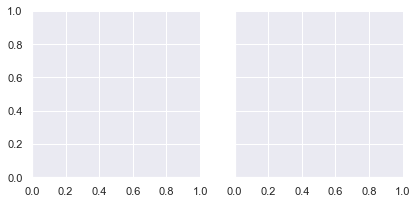

In [27]:
tips = sns.load_dataset('tips')

# Aplicamos FacetGrid con 'col' para separar el contenido en dos graficos
g = sns.FacetGrid(tips, col='time')

### 1.2 Graficar los datos con la funcion FacetGrid.map() 

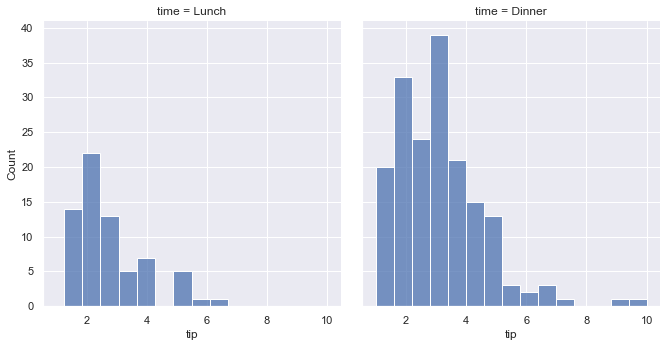

In [37]:
g = sns.FacetGrid(tips, col='time')
# Ahora graficamos utilizamos .map un tipo de grafico, y una variable
g.map(sns.histplot, 'tip')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

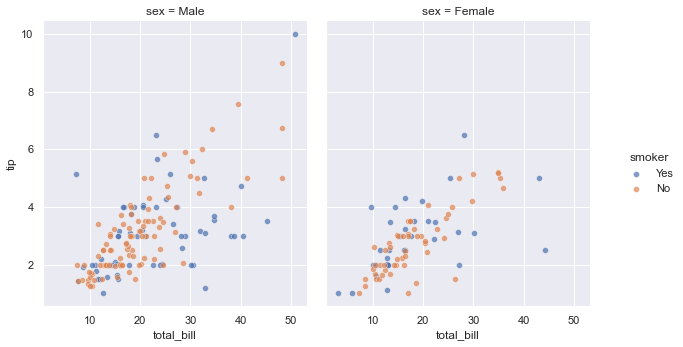

In [36]:
# Para un scatterplot hariamos lo mismo, solo que agregando variables x e y
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=.7)
g.add_legend()
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

Hay varias opciones para controlar el aspecto de la cuadrícula que se pueden pasar al constructor de clases.

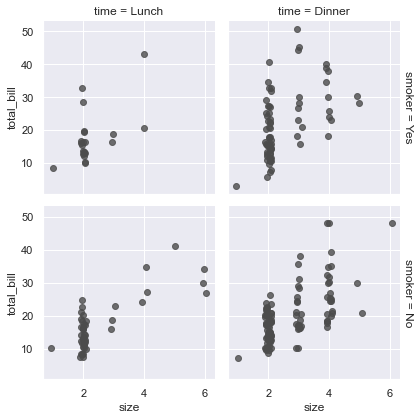

In [38]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', fit_reg=False, x_jitter=.1)

### 1.3 Definir la altura del grafico con el parametro "height"

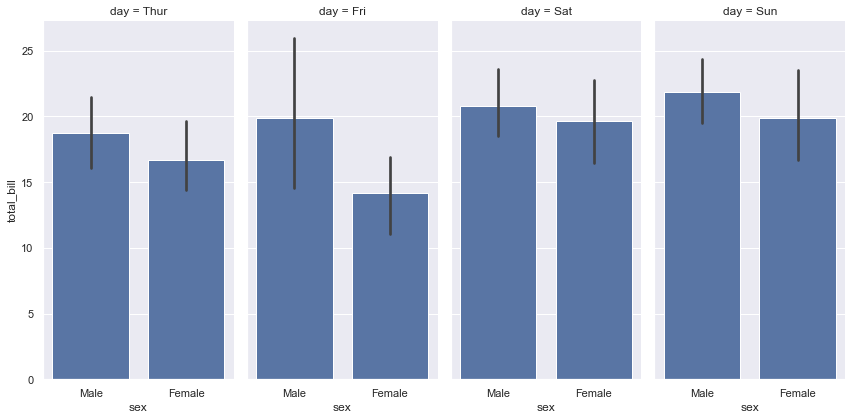

In [42]:
g = sns.FacetGrid(tips, col='day', height=6, aspect=.5)
g.map(sns.barplot, 'sex', 'total_bill', order=['Male', 'Female']);

### 1.4 Ordenar la presentacion de los graficos con el parametro "*_order"

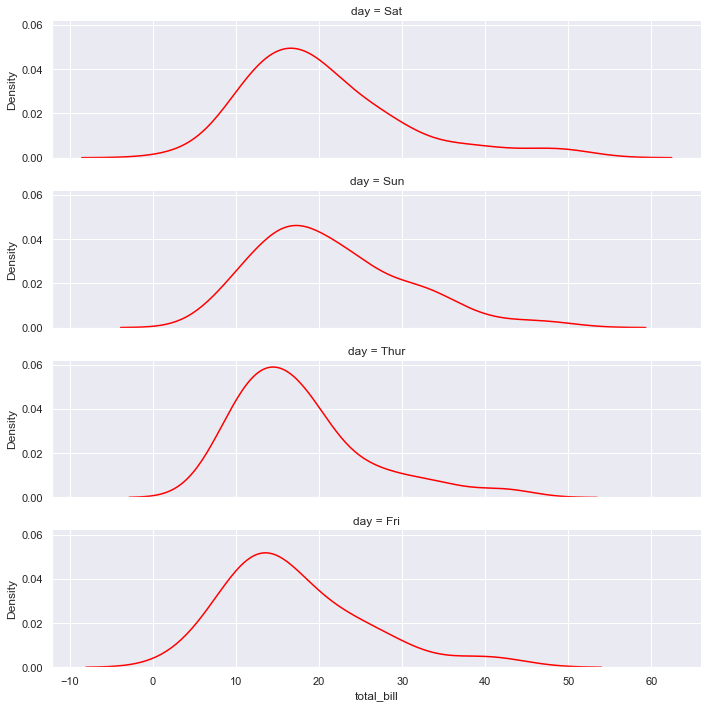

In [48]:
# Creamos una variable de orden
ordered_days = tips.day.value_counts().index

g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=2.5, aspect=4,)
g.map(sns.kdeplot, "total_bill", color='red')

### 1.5 Personalizar los colores con "color_palette()"

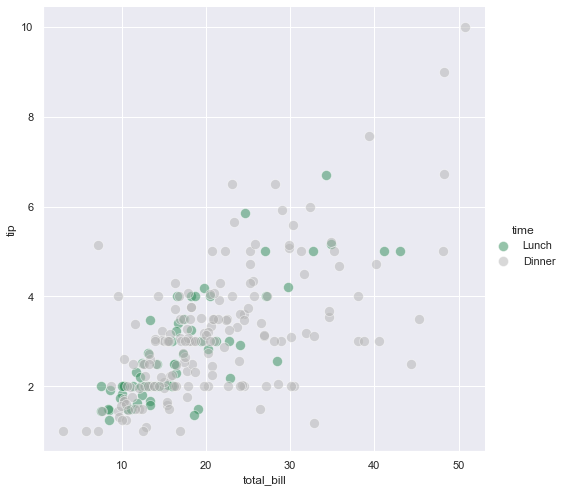

In [50]:
pal = dict(Lunch='seagreen', Dinner='.7')
g = sns.FacetGrid(tips, hue='time', palette=pal, height=7)
g.map(sns.scatterplot, 'total_bill', 'tip', s=100, alpha=.5)
g.add_legend();

### 1.6 Utilizar el argumento  “wrap” cuando tenemos muchas variables categoricas

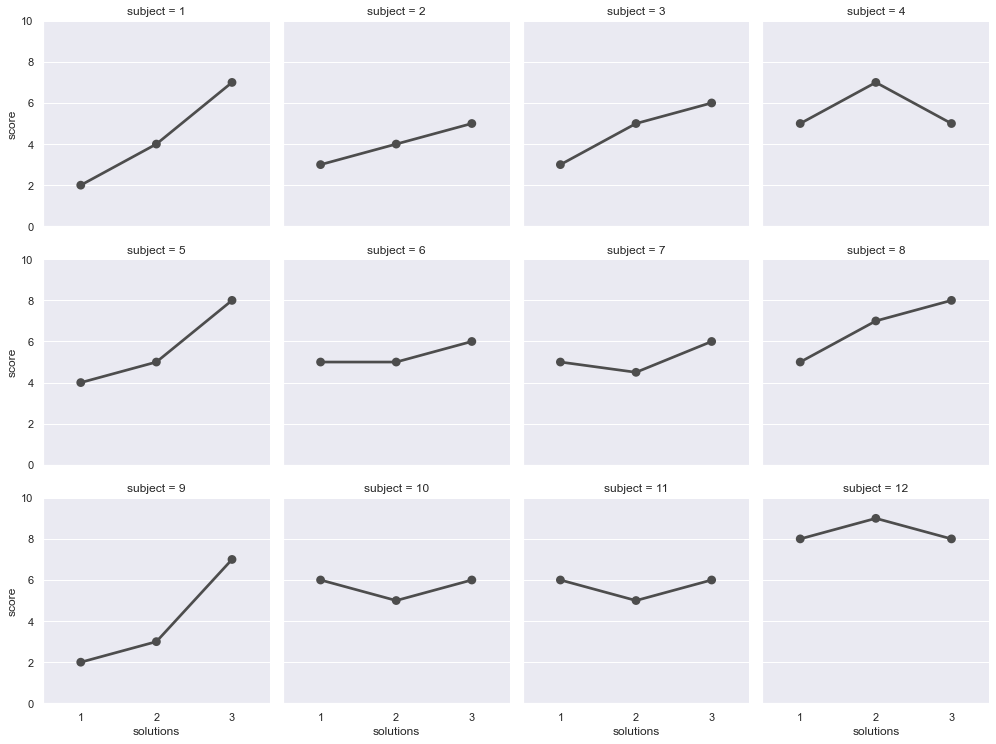

In [53]:
attend = sns.load_dataset('attention').query("subject <= 12")
g = sns.FacetGrid(attend, col='subject', col_wrap=4, height=3.5, ylim=(0,10))
g.map(sns.pointplot, 'solutions', 'score', order=[1,2,3], color='.3', errorbar=None);

## 2. Personalizar los graficos: FacetGrid.set() y FacetGrid.set_axis_labels()

También hay una serie de métodos en el objeto FacetGrid para manipular la figura a un nivel más alto de abstracción. El más general es FacetGrid.set(), y existen otros métodos más especializados como FacetGrid.set_axis_labels(), que respeta el hecho de que las facetas interiores no tienen etiquetas de eje.

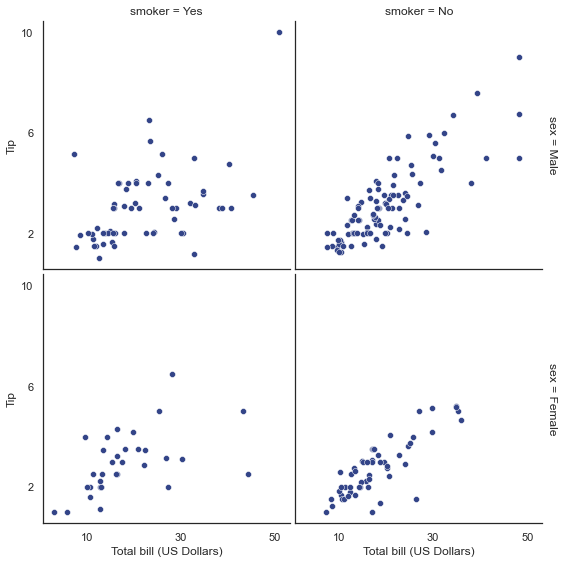

In [55]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=4)
    g.map(sns.scatterplot, "total_bill", "tip", color="#334488")

# Definir las etiquetas
g.set_axis_labels("Total bill (US Dollars)", "Tip")
# Definir los limites de los ejes x e y
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
#Ajustar el espacio entre los graficos
g.figure.subplots_adjust(wspace=.02, hspace=.02)

### 2.1 Personalizar con opciones de matplotlib

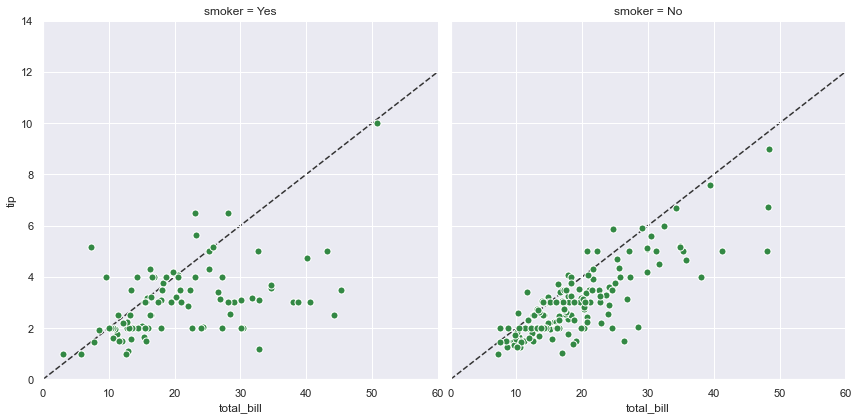

In [58]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=6)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14));

## 3. Utilizar funciones personalizadas

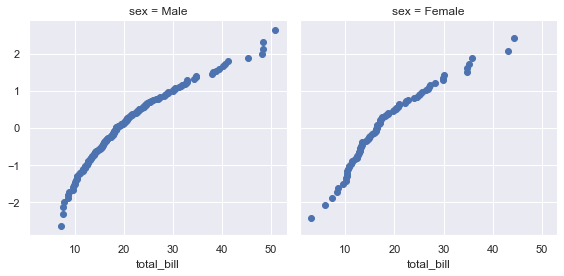

In [59]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

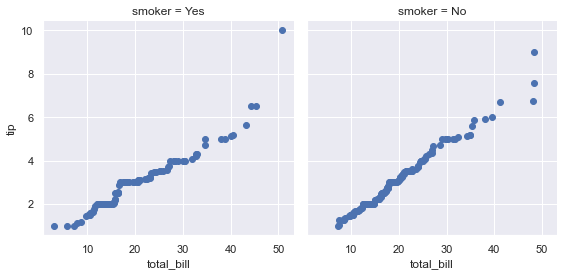

In [60]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip")

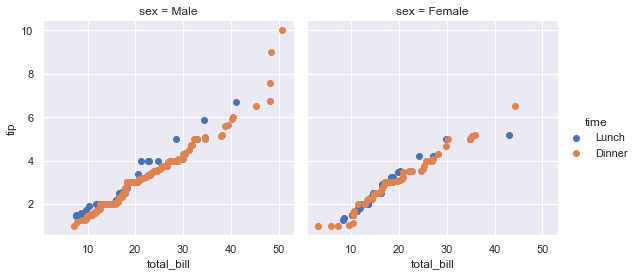

In [61]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

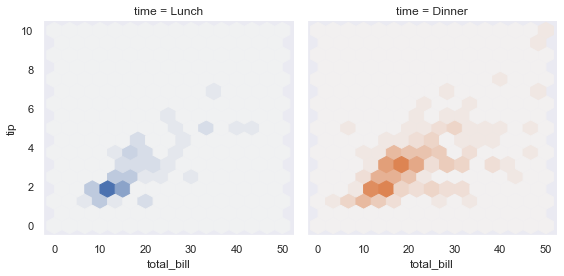

In [62]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## 4. Graficar relaciones de datos por pares - PairGrid 

PairGrid también le permite dibujar rápidamente una cuadrícula de pequeñas subtramas usando el mismo tipo de trama para visualizar datos en cada una. **En un PairGrid, cada fila y columna se asigna a una variable diferente, por lo que el gráfico resultante muestra cada relación por pares en el conjunto de datos**. El uso de PairGrid puede brindarle un resumen muy rápido y de muy alto nivel de las relaciones interesantes en su conjunto de datos.

El uso básico de la clase es muy similar a FacetGrid. Primero inicializa la cuadrícula, luego **pasa la función de trazado a un método de map** y se llamará en cada subparcela. También hay una función complementaria, pairplot() que compensa cierta flexibilidad para un trazado más rápido

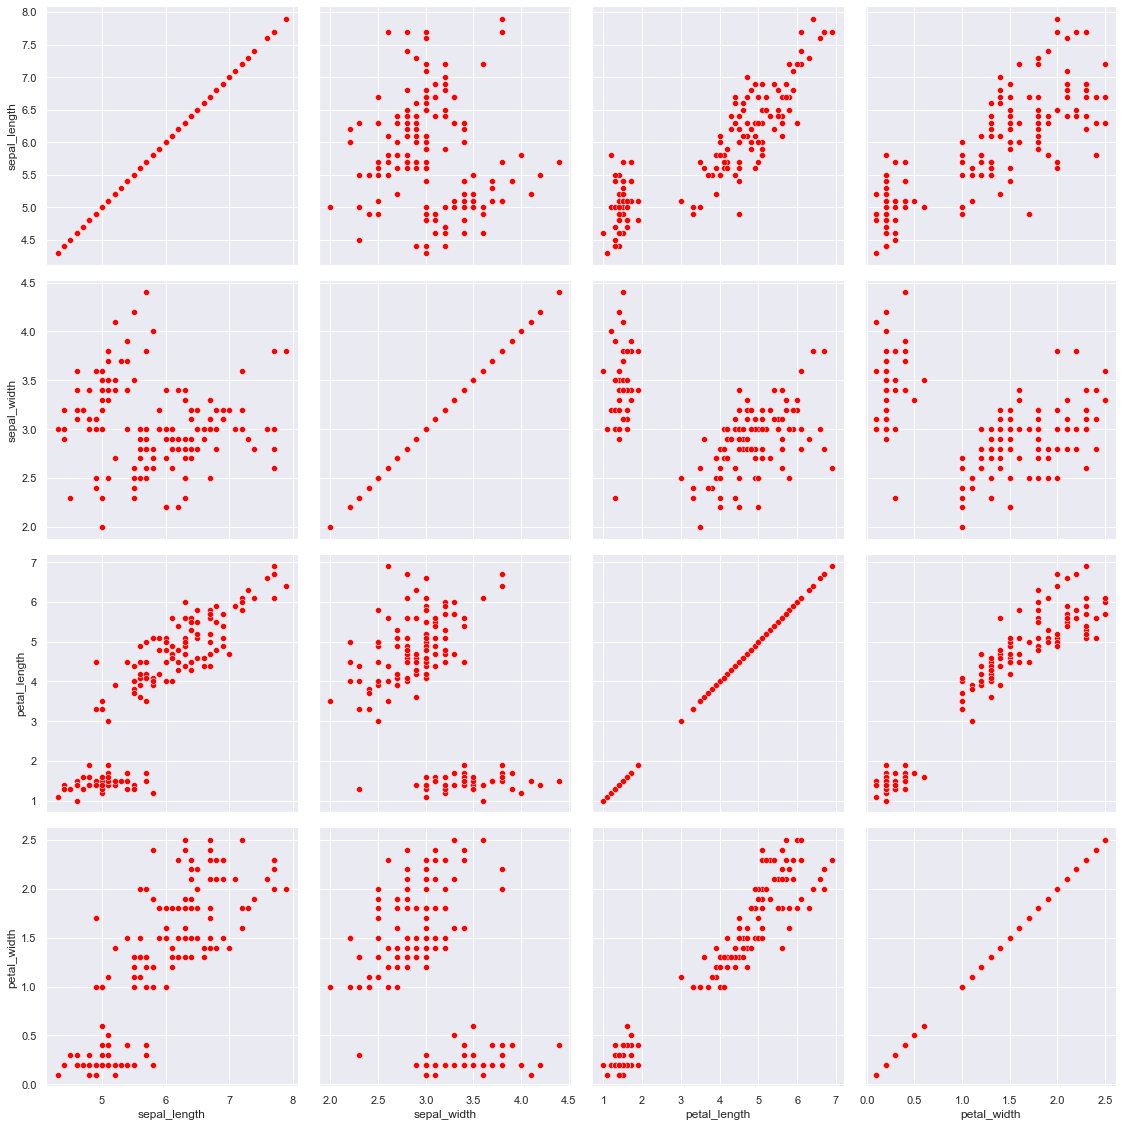

In [66]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, height=4)
g.map(sns.scatterplot, color='red');

### 4.1 Graficar una figura diferente en cada eje con: "map_diag" y ""map_offdiag"

Es posible trazar una función diferente en la diagonal para mostrar la distribución univariada de la variable en cada columna. Sin embargo, tenga en cuenta que las marcas del eje no se corresponderán con el eje de conteo o densidad de esta gráfica.

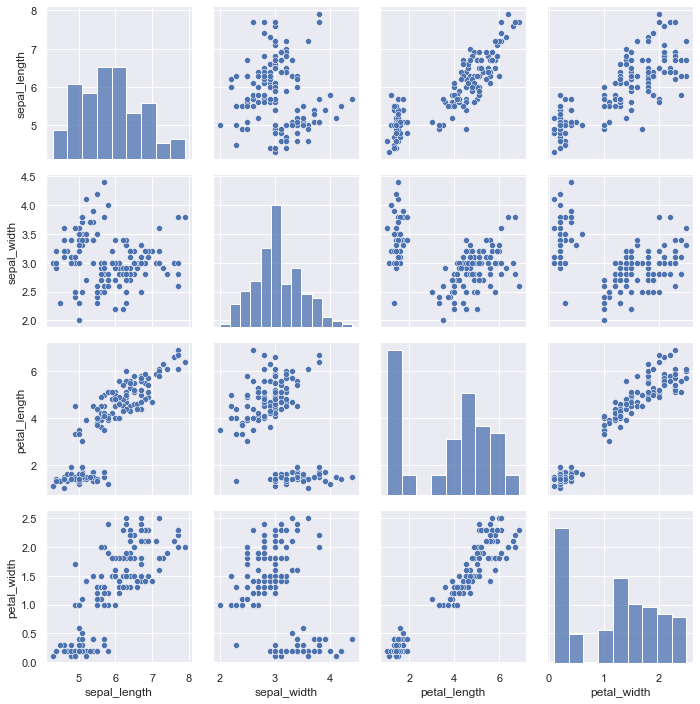

In [68]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot) # En la diagonal
g.map_offdiag(sns.scatterplot) # Fuera de la diagonal

### 4.2 Agregar una variable categorica con "hue"

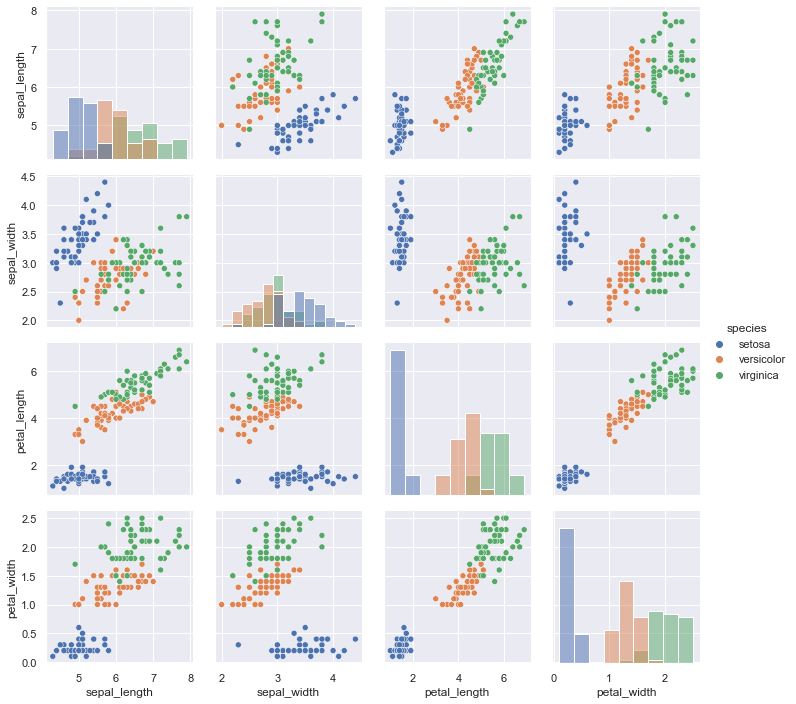

In [69]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

### 4.3 Podemos seleccionar columnas especificas con "vars"

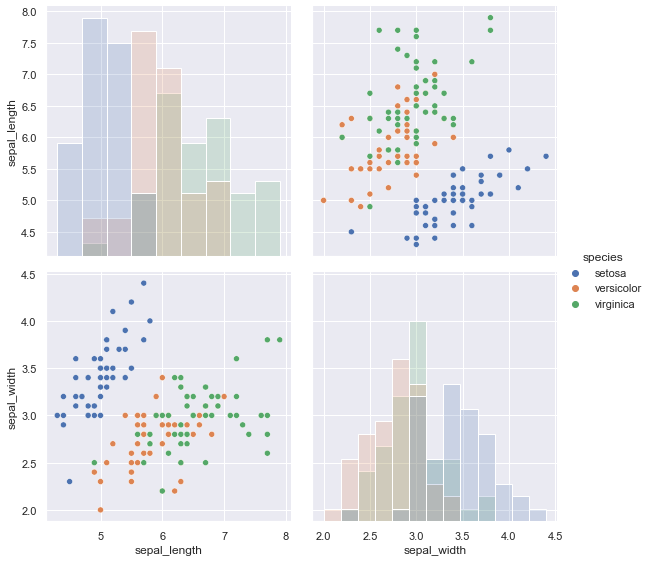

In [76]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue='species', height=4)
g.map_diag(sns.histplot, alpha=.2)
g.map_offdiag(sns.scatterplot)
g.add_legend();

### 4.4 Asignar funciones diferentes para los elementos arriba y abajo de la diagonal: g.map_upper y g.map_lower

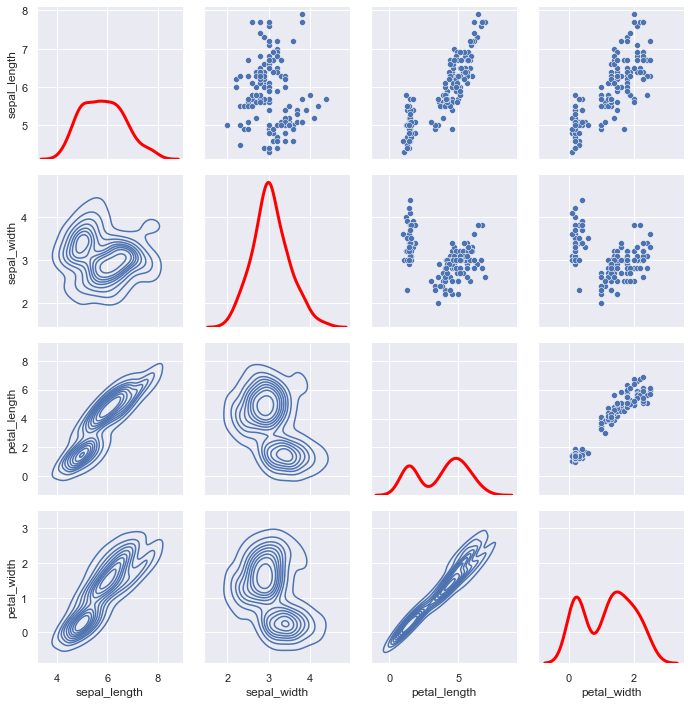

In [77]:
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False, color='red')

### 4.5 Graficar variables especificas en cada eje: y_vars=, x_vars=

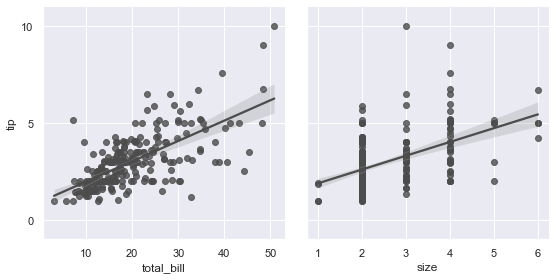

In [81]:
# Graficamos con una variable en y, pero con dos variables en x
g = sns.PairGrid(tips, y_vars=['tip'], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color='.3')
g.set(ylim=(-1,11), yticks=[0, 5, 10]);

### 4.6 Utilizar una paleta de colores

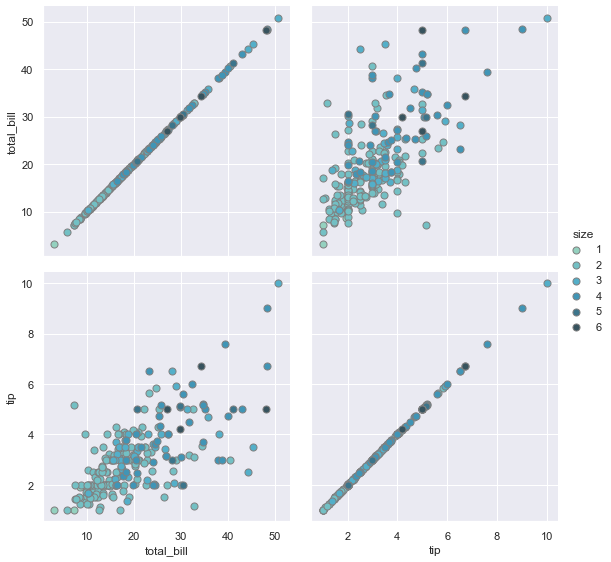

In [84]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d", height=4)
g.map(plt.scatter, s=50, edgecolor="gray")
g.add_legend()

### 4.7 Para analisis rapidos utilizar "pairplot()"

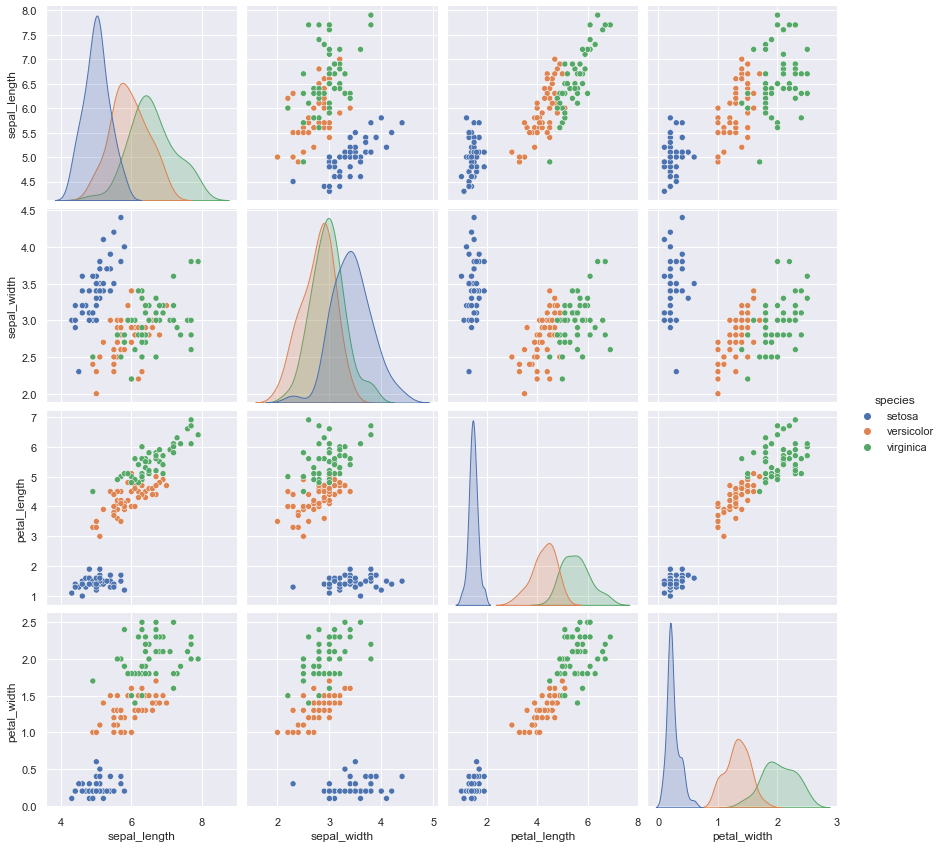

In [86]:
sns.pairplot(iris, hue="species", height=3)

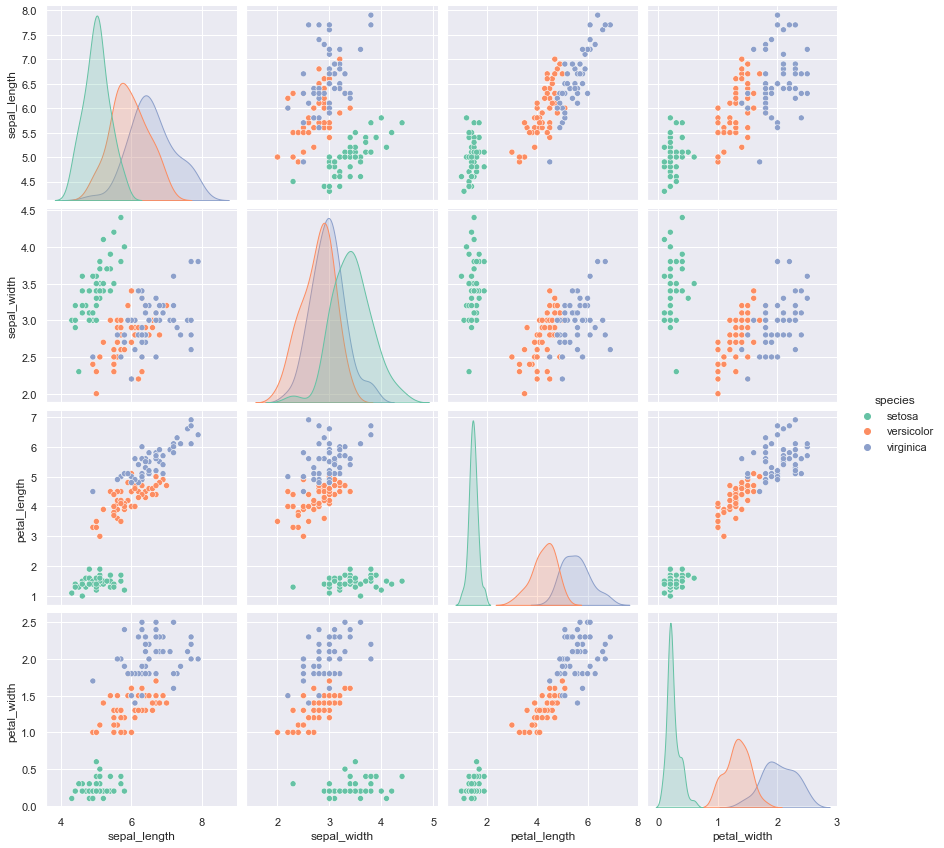

In [87]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=3)